In [63]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from scipy.integrate import solve_ivp
import pandas as pd

from utils import CrazyflieParams, PIDGains

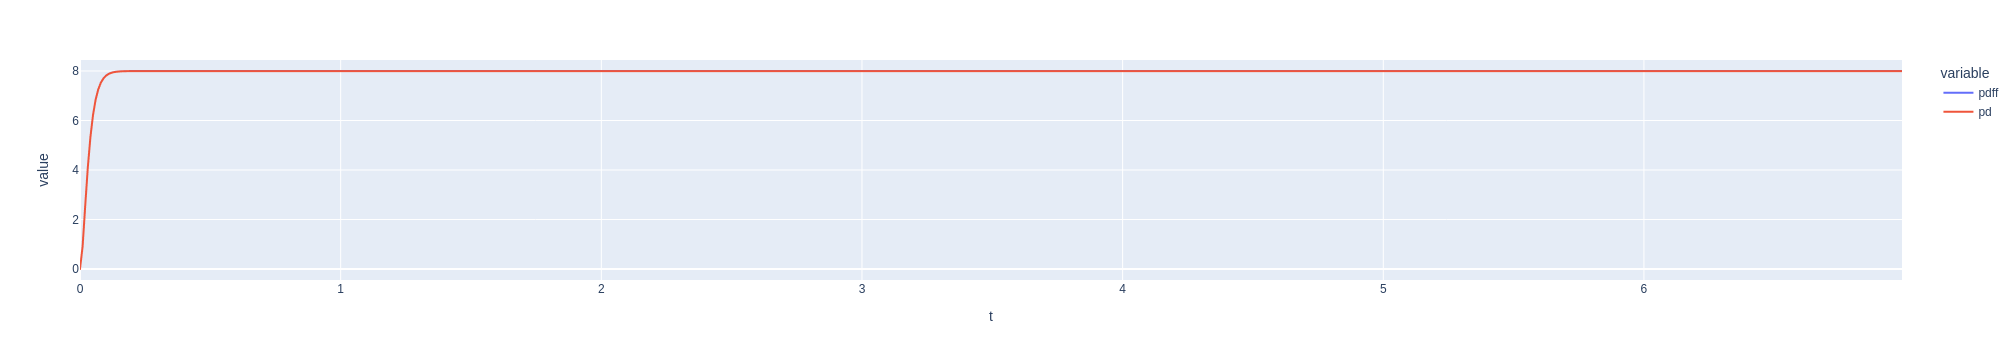

In [87]:
params = CrazyflieParams()

def sim_quad(f_control, t_end, y_0):
    def quad_rate_func(t, y):
        F_in = f_control(y)

        # Double integrator with gravity dynamics
        return np.array([y[1], 1/params.mass * (F_in - params.mass * params.g)])

    sim_time = np.arange(0, t_end, 0.01)
    return solve_ivp(quad_rate_func, [0, t_end], y_0, t_eval=sim_time)

df_results = pd.DataFrame({"t": ode_soln.t})
df_results.set_index("t")

ref = np.array([8, 0])
y_0 = np.array([0, 0])
gains = PIDGains(100, 0, 3.5)

# PDFF control is full-state-feedback
K = np.array([gains.kp, gains.kd])
f_control = lambda y: np.dot(K, ref - y) + params.mass * params.g
soln_pdff = sim_quad(f_control, 7, y_0)

df_results.insert(len(df_results.columns), "pdff", soln_pdff.y[0, :])

# Just PD
K = np.array([gains.kp, gains.kd])
f_control = lambda y: np.dot(K, ref - y)
soln_pd = sim_quad(f_control, 7, y_0)

df_results.insert(len(df_results.columns), "pd", soln_pd.y[0, :])

# Expected analytic form for PDFF simulation


px.line(df_results, x="t", y=df_results.columns).show()